## APL Preliminary Report
### Samara Klar
### Chris Weber
### School of Government and Public Policy

Dynata/SSI collected these data. N=1,144 participants were contacted. Most respondents were contacted by email, a smaller sample was contacted by phone. The phone interviews did not come with gender and age -- these were imputed through a process known as multiple imputation through chained equations (MICE). It's commonly used in Stata, so this is what I opted to use. We weight back to state population proportions, with respect to age, sex, ethnicity, and race. It's trivial to weight on other things, but this is a fine starting place, I think. Here's the recoding stuff -- just scroll down if you're not interested. For presentation purposes, I recoded much of the data as three categories. That's fine for simple descriptive statistics, but I also recoded the numeric data should we try to do something somewhat more complex. 


In [16]:
library(dplyr)
library(survey)  
library(mice)  

data<-read.csv("~/Desktop/APL Survey/APLData.csv")

dat<-data.frame(ID=seq(1:length(data[,1])))

clean_data<-dat %>% 
  mutate(time_az=recode(data$q1, `1`=1, `2`=2, `3`=3)) %>%
  mutate(interests=recode(data$q2, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(interest_r=recode(data$q2, `1`="Similar", `2`="Similar", `3`="Neither", `4`="Different", `5`="Different" )) %>%
  mutate(identity_AZ=recode(data$q3, `1`=7, `2`=6, `3`=5, `4`=4, `5`=3, `6`=2 , `7`=1 )) %>%
  mutate(identity_AZ_r=recode(data$q3, `1`="Strong", `2`="Strong", `3`="Strong", `4`="Neutral", `5`="Weak", `6`="Weak" , `7`="Weak" )) %>%
  mutate(identity_US=recode(data$q4, `1`=7, `2`=6, `3`=5, `4`=4, `5`=3, `6`=2 , `7`=1 )) %>%
  mutate(identity_US_r=recode(data$q4, `1`="Strong", `2`="Strong", `3`="Strong", `4`="Neutral", `5`="Weak", `6`="Weak" , `7`="Weak" )) %>%
  mutate(needs_met=recode(data$q5, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(needs_met_r=recode(data$q5, `1`="Better", `2`="Better", `3`="Same", `4`="Worse", `5`="Worse" )) %>%
  mutate(rep_ideo=recode(data$q6, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(rep_ideo_r=recode(data$q6, `1`="Conservative", `2`="Conservative", `3`="Same", `4`="Liberal", `5`="Liberal" )) %>%
  mutate(dem_ideo=recode(data$q7, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(dem_ideo_r=recode(data$q7, `1`="Conservative", `2`="Conservative", `3`="Same", `4`="Liberal", `5`="Liberal" )) %>%
  mutate(covid_affected=recode(data$q8, `1`=1, `2`=0, `2`=0)) %>%
  mutate(covid_affected_r=recode(data$q8, `1`="Yes", `2`="No", `2`="No")) %>%
  mutate(covid_finance=recode(data$q9, `1`=1, `2`=0, `2`=0)) %>%
  mutate(covid_finance_r=recode(data$q9, `1`="Yes", `2`="No", `2`="No")) %>%
  mutate(wear_mask=recode(data$q10, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(wear_mask_r=recode(data$q10, `1`="Often", `2`="Often", `3`="Half Time", `4`="Rarely", `5`="Rarely" )) %>%
  mutate(public_mask=recode(data$q11, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(public_mask_r=recode(data$q11, `1`="Yes", `2`="Yes", `3`="Not Sure", `4`="No", `5`="No" )) %>%
  mutate(k12=recode(data$q12, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(k12_r=recode(data$q12, `1`="Online", `2`="Online", `3`="Not Sure", `4`="In Person", `5`="In Person" )) %>%
  mutate(college=recode(data$q13, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(college_r=recode(data$q13, `1`="Online", `2`="Online", `3`="Not Sure", `4`="In Person", `5`="In Person")) %>% 
  # Approval
  mutate(trump_covid=recode(data$q14, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(ducey_covid=recode(data$q15, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(mayor_covid=recode(data$q16, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(trump_covid_r=recode(data$q14, `1`="Approve", `2`="Approve", `3`="Not Sure", `4`="Disapprove", `5`="Disapprove" )) %>%
  mutate(ducey_covid=recode(data$q15,  `1`="Approve", `2`="Approve", `3`="Not Sure", `4`="Disapprove", `5`="Disapprove" )) %>%
  mutate(mayor_covid=recode(data$q16,  `1`="Approve", `2`="Approve", `3`="Not Sure", `4`="Disapprove", `5`="Disapprove" )) %>%
  # Policies, Conservative driection
  mutate(border_wall=recode(data$q17, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(border_wall_r=recode(data$q17,  `1`="Approve", `2`="Approve", `3`="Not Sure", `4`="Disapprove", `5`="Disapprove" )) %>%
  mutate(imm_citizenship=recode(data$q18, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5 )) %>%
  mutate(imm_citizenship_r=recode(data$q18,  `1`="Support", `2`="Support", `3`="Not Sure", `4`="Oppose", `5`="Oppose" )) %>%
  mutate(imm_hurt_az=recode(data$q19, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5 )) %>%
  mutate(imm_hurt_az_r=recode(data$q19, `1`="Help", `2`="Help", `3`="Neutral", `4`="Hurt", `5`="Hurt" )) %>%
  mutate(imm_hurt_culture=recode(data$q20, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5 )) %>%
  mutate(imm_hurt_culture_r=recode(data$q20,  `1`="Help", `2`="Help", `3`="Neutral", `4`="Hurt", `5`="Hurt" )) %>%
  mutate(oppose_race_protests=recode(data$q21, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5 )) %>%
  mutate(oppose_race_protests_r=recode(data$q21,  `1`="Approve", `2`="Approve", `3`="Not Sure", `4`="Disapprove", `5`="Disapprove" )) %>%
  # Policies, More contact and positive with police
  mutate(interact_law=recode(data$q22, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(positive_law=recode(data$q23, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(positive_law_r=recode(data$q23, `1`="Positive", `2`="Positive", `3`="Mix", `4`="Negative", `5`="Negative" )) %>%
  # Pol Participation  
  mutate(registered=recode(data$q24, `1`=1, `2`=0)) %>%
  mutate(plan_to_vote_pres=recode(data$q25, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(vote_preference_pres=recode(data$q26, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5 )) %>%
  mutate(biden_v_trump_r=recode(data$q26, `1`="Biden(D)", `2`="Biden(D)",`4`="Trump(R)", `5`="Trump(R)", `3`="Other/Not Sure", `6`="Someone Else" )) %>%
  mutate(plan_to_vote_senate=recode(data$q27, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(vote_preference_sen=recode(data$q28, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5 )) %>%
  mutate(mcsally_v_kelly=recode(data$q28, `1`="Kelly(D)", `2`="Kelly(D)",`4`="McSally(R)", `5`="McSally(R)", `3`="Other/Not Sure", `6`="Someone Else" )) %>%
  ## Partisanship
  mutate(pid=recode(data$q29, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5 , `6`=6 , `7`=7 )) %>%
  mutate(pid3=recode(data$q29, `1`="Democrat", `2`="Democrat", `3`="Independent", `4`="Independent", `5`="Independent" , `6`="Republican" , `7`="Republican" )) %>%
    ## Feeling therms
  mutate(dem_ft=data$q30) %>%
  mutate(rep_ft=data$q31) %>%
  mutate(dem_ft_people=data$q32) %>%
  mutate(rep_ft_people=data$q33) %>%
  mutate(ideo=recode(data$q34, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5)) %>%
  mutate(ideo_r=recode(data$q29, `1`="Liberal", `2`="Liberal", `3`="Moderate", `4`="Conservative", `5`="Conservative" )) %>%
  ##Dems
  mutate(hispanic=recode(data$q35, `1`=1, `2`=0)) %>%
  mutate(race=recode(data$q36, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5)) %>%
  mutate(christian=recode(data$q37, `1`=1, `2`=1, `3`=0, `4`=0, `5`=0)) %>%
  mutate(income=recode(data$q38, `1`=1, `2`=2, `3`=3, `4`=4)) %>%
  mutate(children=recode(data$q39, `1`=1, `2`=0)) %>%
  mutate(age=recode(data$age, `1`=1, `2`=2, `3`=3, `4`=4)) %>%
  mutate(sex=recode(data$gender, `1`=1, `2`=2)) 

tempData <- mice(clean_data,m=1,maxit=50,meth='pmm',seed=500)
clean_data<-complete(tempData,1)


Warning message:
“Unreplaced values treated as NA as .x is not compatible. Please specify replacements exhaustively or supply .default”Warning message:
“Unreplaced values treated as NA as .x is not compatible. Please specify replacements exhaustively or supply .default”Warning message:
“Unreplaced values treated as NA as .x is not compatible. Please specify replacements exhaustively or supply .default”Warning message:
“Unreplaced values treated as NA as .x is not compatible. Please specify replacements exhaustively or supply .default”Warning message:
“Unreplaced values treated as NA as .x is not compatible. Please specify replacements exhaustively or supply .default”Warning message:
“Unreplaced values treated as NA as .x is not compatible. Please specify replacements exhaustively or supply .default”Warning message:
“Unreplaced values treated as NA as .x is not compatible. Please specify replacements exhaustively or supply .default”Warning message:
“Unreplaced values treated as NA as .x


 iter imp variable
  1   1  covid_affected  covid_finance  registered  vote_preference_pres  vote_preference_sen  christian  age  sex
  2   1  covid_affected  covid_finance  registered  vote_preference_pres  vote_preference_sen  christian  age  sex
  3   1  covid_affected  covid_finance  registered  vote_preference_pres  vote_preference_sen  christian  age  sex
  4   1  covid_affected  covid_finance  registered  vote_preference_pres  vote_preference_sen  christian  age  sex
  5   1  covid_affected  covid_finance  registered  vote_preference_pres  vote_preference_sen  christian  age  sex
  6   1  covid_affected  covid_finance  registered  vote_preference_pres  vote_preference_sen  christian  age  sex
  7   1  covid_affected  covid_finance  registered  vote_preference_pres  vote_preference_sen  christian  age  sex
  8   1  covid_affected  covid_finance  registered  vote_preference_pres  vote_preference_sen  christian  age  sex
  9   1  covid_affected  covid_finance  registered  vote_pre

Warning message:
“Number of logged events: 25”

Here's how I raked -- Samara, I used the census data you sent for the marginal distributions. 

In [17]:
head(clean_data)

ID,time_az,interests,interest_r,identity_AZ,identity_AZ_r,identity_US,identity_US_r,needs_met,needs_met_r,...,rep_ft_people,ideo,ideo_r,hispanic,race,christian,income,children,age,sex
1,3,3,Neither,4,Neutral,7,Strong,2,Worse,...,90,2,Liberal,0,1,0,1,0,4,1
2,3,3,Neither,4,Neutral,7,Strong,3,Same,...,20,5,Conservative,0,1,1,4,0,4,2
3,3,4,Similar,7,Strong,7,Strong,3,Same,...,25,4,NA,0,1,1,4,0,3,1
4,3,3,Neither,5,Strong,6,Strong,5,Better,...,0,3,Liberal,0,1,0,3,1,1,1
5,3,3,Neither,3,Weak,7,Strong,3,Same,...,50,4,Conservative,0,1,0,1,0,4,1
6,1,2,Different,4,Neutral,7,Strong,3,Same,...,0,5,NA,0,1,1,1,0,4,2


In [22]:
library(survey)
model<-svydesign(ids=~1, data=clean_data)
hispanic_dist<-data.frame(hispanic=c(0, 1),
                             Freq=nrow(clean_data)*c(0.69,0.31))
race_dist<-data.frame(race=c(1,2,3,4,5),
                          Freq=nrow(clean_data)*c(0.77, 0.04, 0.03, 0.04, 0.12))
age_dist<-data.frame(age=c(1,2,3,4),
                      Freq=nrow(clean_data)*c(0.32, 0.30, 0.15, 0.23))
sex_dist<-data.frame(sex=c(1,2),
                     Freq=nrow(clean_data)*c(0.50, 0.5))

raked_data<-rake(design=model,
                 sample.margins=list(~hispanic, ~race, ~sex, ~age),
                 population.margins=list(hispanic_dist, race_dist, sex_dist, age_dist))
raked_data

Warning message in svydesign.default(ids = ~1, data = clean_data):
“No weights or probabilities supplied, assuming equal probability”

Independent Sampling design (with replacement)
rake(design = model, sample.margins = list(~hispanic, ~race, 
    ~sex, ~age), population.margins = list(hispanic_dist, race_dist, 
    sex_dist, age_dist))

In [23]:
svytable(~public_mask_r+pid3, raked_data) %>%
  as.data.frame() %>%
  mutate(Proportion=Freq/sum(Freq))



public_mask_r,pid3,Freq,Proportion
No,Democrat,15.161471,0.013253034
Not Sure,Democrat,7.787953,0.006807651
Yes,Democrat,298.387875,0.260828562
No,Independent,150.499756,0.131555731
Not Sure,Independent,42.339229,0.037009816
Yes,Independent,339.455867,0.296727156
No,Republican,112.980783,0.098759426
Not Sure,Republican,23.774739,0.020782114
Yes,Republican,153.612327,0.134276509


## Univariate Stuff
### Cultural Issues

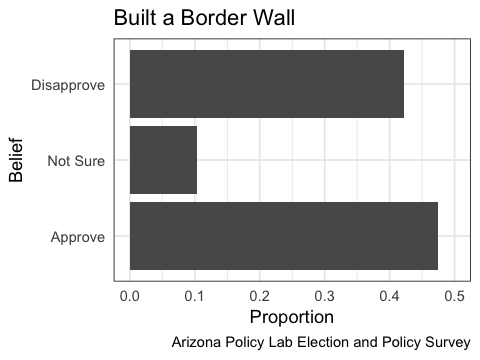

In [30]:
library(survey)
library(ggplot2)
options(repr.plot.width=4, repr.plot.height=3)

uni_dist<-function(var, design, title,
                   xlabel="Test", upper=0.5){
  f<-as.formula(paste0("~", var))
  tab_w<-svytable(f, design) %>%
    as.data.frame() %>%
    mutate(Proportion=Freq/sum(Freq)) %>%
    arrange(desc(Proportion)) 
    return(tab_w)
}
uni_plot<-function(tab_w, title, upper){
  plot<-ggplot(data=tab_w, mapping=aes(x=tab_w[,1], y=Proportion)) +
    geom_col()+
    coord_flip()+
    theme_bw() +
    theme(axis.ticks=element_blank())+
    ggtitle(title)+
    scale_y_continuous("Proportion", limits=c(0,upper))+
    scale_x_discrete("Belief")+
    labs(caption="Arizona Policy Lab Election and Policy Survey")
  return(plot)
}

tab_w<-uni_dist("border_wall_r", raked_data, title="Beliefs about Building a Southern Border Wall", xlabel="Border Wall", upper=1)
tab_w[,1]<-factor(tab_w[,1], c("Approve", "Not Sure", "Disapprove"))
uni_plot(tab_w, title="Built a Border Wall", upper=0.5)



Arizonans are polarized on the issue of building a **southern border wall**, while on the whole holding favorable attitudes towards immigrants. Large numbers believe immigrants help the culture in Arizona, and favor a path for citizenship for Dreamers.

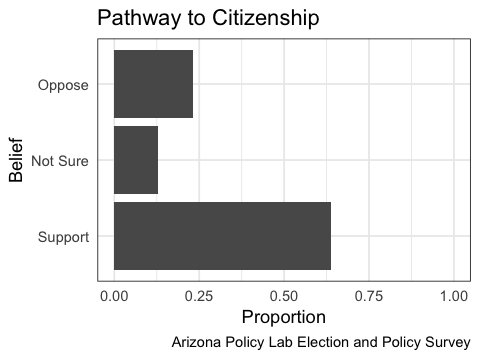

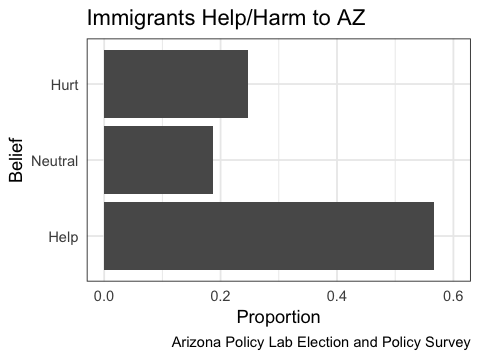

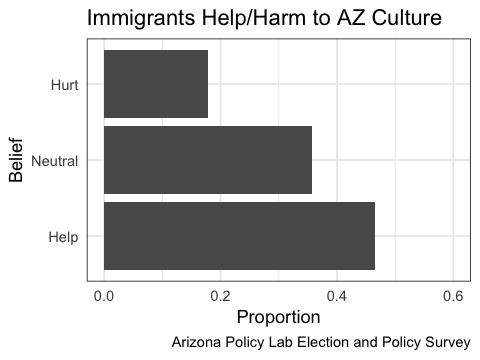

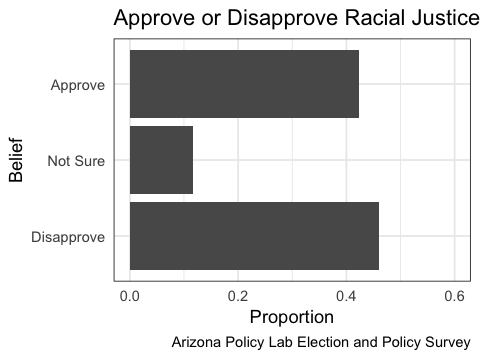

In [32]:
options(repr.plot.width=4, repr.plot.height=3)


tab_w<-uni_dist("imm_citizenship_r", raked_data, title="Pathway to Citizenship", xlabel="Citizenship", upper=1)
tab_w[,1]<-factor(tab_w[,1], c("Support", "Not Sure", "Oppose"))
uni_plot(tab_w, title="Pathway to Citizenship", upper=1)

tab_w<-uni_dist("imm_hurt_az_r", raked_data, title="Do Immigrants Help or Hurt AZ?", xlabel="Harm", upper=1)
tab_w[,1]<-factor(tab_w[,1], c("Help", "Neutral", "Hurt"))
uni_plot(tab_w, title="Immigrants Help/Harm to AZ", upper=0.6)

tab_w<-uni_dist("imm_hurt_culture_r", raked_data, title="Do Immigrants Help or Hurt Culture?", xlabel="Harm", upper=1)
tab_w[,1]<-factor(tab_w[,1], c("Help", "Neutral", "Hurt"))
uni_plot(tab_w, title="Immigrants Help/Harm to AZ Culture", upper=0.6)

tab_w<-uni_dist("oppose_race_protests_r", raked_data, title="Approve or Disapprove Racial Justice Protests", xlabel="Harm", upper=1)
tab_w[,1]<-factor(tab_w[,1], c("Disapprove", "Not Sure", "Approve"))
uni_plot(tab_w, title="Approve or Disapprove Racial Justice Protests", upper=0.6)

## Partisan Differences

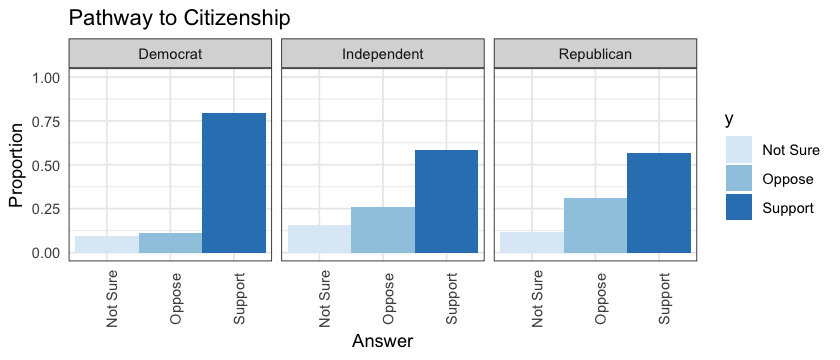

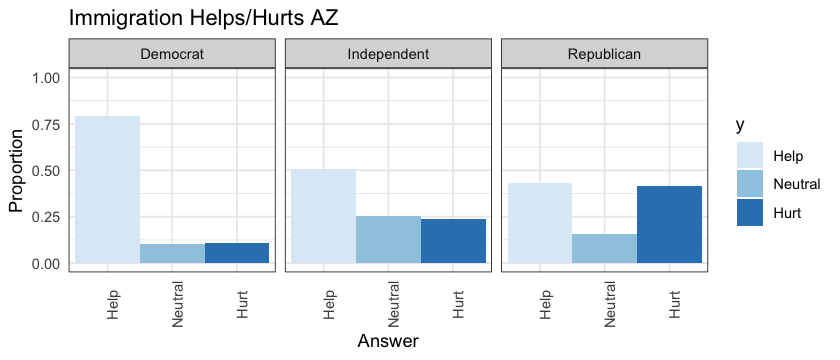

In [86]:
options(repr.plot.width=7, repr.plot.height=3)



  ## Take this function apart
bi_plot<-function(var1, var2, design, title="This",
                   xlabel="That", ylabel="And"){
  f<-as.formula(paste0("~", var1,"+", var2))
  tab_w<-svytable(f, design) %>%
    as.data.frame() %>% group_by(pid3) %>%
    mutate(total=sum(Freq)) %>%
    ungroup() %>%
   mutate(Proportion=Freq/total) 
  
  names(tab_w)<-c("y", "group", "frequency", "total", "Proportion")
  return(tab_w)
}

### Enter all the variables here

plot.fun<-function(title, upper) { 
    plot <- ggplot(tab_w, aes(x = y, y = Proportion, fill = y)) + 
        facet_wrap(~group) + geom_bar(width = 1, stat = "identity") + 
        scale_fill_brewer() + theme_bw() + theme(axis.ticks = element_blank(), axis.text.x = element_text(angle = 90)) + 
        ggtitle(title) + scale_y_continuous("Proportion", limits = c(0, upper)) + scale_x_discrete("Answer")
    return(plot)
}

tab_w<-bi_plot("imm_citizenship_r", "pid3", raked_data )
#tab_w$y<-factor(tab_w$y, c("Support", "Not Sure", "Oppose"))
plot.fun("Pathway to Citizenship", 1)

tab_w<-bi_plot("imm_hurt_az_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y, c("Help", "Neutral", "Hurt"))
plot.fun("Immigration Helps/Hurts AZ", 1)





y,group,frequency,total,Proportion
Help,Democrat,221.72710,321.3373,0.69001357
Hurt,Democrat,11.63178,321.3373,0.03619804
Neutral,Democrat,87.97842,321.3373,0.27378839
Help,Independent,204.30952,532.2949,0.38382772
Hurt,Independent,90.89516,532.2949,0.17076092
Neutral,Independent,237.09018,532.2949,0.44541137
Help,Republican,105.90469,290.3678,0.36472594
Hurt,Republican,101.54983,290.3678,0.34972823
Neutral,Republican,82.91333,290.3678,0.28554584


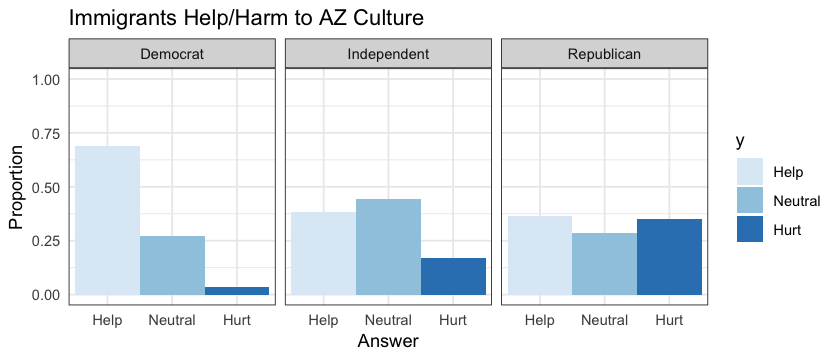

In [84]:

tab_w<-bi_plot("imm_hurt_culture_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y, c("Help", "Neutral", "Hurt"))
plot.fun("Immigrants Help/Harm to AZ Culture",1)
tab_w


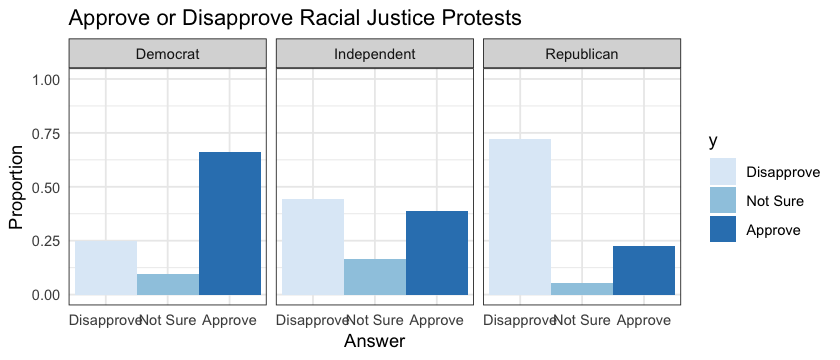

In [85]:
tab_w<-bi_plot("oppose_race_protests_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y, c("Disapprove", "Not Sure", "Approve"))
plot.fun("Approve or Disapprove Racial Justice Protests",1)

